In [29]:
#Feature selection
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Import Pandas Dataframe Profile Report
from pandas_profiling import ProfileReport

# Import accuracy score 
from sklearn.metrics import accuracy_score

#visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report

#import numpay and Pandas
import numpy as np
import pandas as pd

from sklearn import linear_model

In [30]:
def display_dataset_head(df):
    return df.head()    

In [31]:
def display_dataset_tail(df):
    return df.tail()

In [32]:
def get_dataset_information(df):
    return df.info()

In [33]:
def get_null_values_status(df):
    a = df.isnull().sum()
    flag = True
    for i in a:
        if i==0:
            pass
        else:
            flag = False
    return flag
    #return df.isnull.sum()

In [34]:
def get_na_values_status(df):
    a = df.isna().sum()
    flag = True
    for i in a:
        if i==0:
            pass
        else:
            flag = False
    return flag    

In [35]:
def get_unique_values_status(df):
    return df.nunique()

In [36]:
def get_statistical_information(df):
    return df.describe()

In [37]:
def initiate_encoding(df, encoding_cols):
    l1 = []
    for i in range(len(categorical_data_cols)+1):
        l1.append({})
    #ls = fdf[categorical_data_cols[0]].unique()
    #print(ls)

    for i in encoding_cols:
        ls = fdf[i].unique()
    #print(ls)

    for i in range(len(encoding_cols)):
        ls=fdf[encoding_cols[i]].unique()
        k = 0
        for j in ls:
            l1[i][j] = k
            k += 1
    return l1

In [38]:
def encoding1(cr_ds, sd, cd, fd):
    soil_type_label_encoder = LabelEncoder()
    cr_ds["Soil_Type"] = soil_type_label_encoder.fit_transform(cr_ds["Soil_Type"])

    crop_type_label_encoder = LabelEncoder()
    cr_ds["Crop_Type"] = crop_type_label_encoder.fit_transform(cr_ds["Crop_Type"])

    fertname_label_encoder = LabelEncoder()
    cr_ds["Fertilizer_Name"] = fertname_label_encoder.fit_transform(cr_ds["Fertilizer_Name"])


    #soiltype_dict = {}
    for i in range(len(cr_ds["Soil_Type"].unique())):
        sd[i] = soil_type_label_encoder.inverse_transform([i])#[0]
    
    #print(sd)

    #croptype_dict = {}
    for i in range(len(cr_ds["Crop_Type"].unique())):
        cd[i] = crop_type_label_encoder.inverse_transform([i])#[0]
    #print(croptype_dict)

    #fertname_dict = {}
    for i in range(len(cr_ds["Fertilizer_Name"].unique())):
        fd[i] = fertname_label_encoder.inverse_transform([i])#[0]
    #print(fertname_dict)

    return cr_ds, sd, cd, fd


In [39]:
#setting dataset path
file_path = "Fertilizer_Prediction_New.csv"

#loading dataset
fdf = pd.read_csv(file_path)
fdf.head()

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [40]:
display_dataset_head(fdf)

,Temperature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [41]:
get_dataset_information(fdf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temperature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil_Type        99 non-null     object
 4   Crop_Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer_Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [42]:
if get_null_values_status(fdf) == True:
    print('None of the Features have NULL values')
else:
    print('Attributes have NULL Values')

None of the Features have NULL values


In [43]:
if get_na_values_status(fdf) == True:
    print('None of the Features have Missing values')
else:
    print('Attributes have Missing Values')

None of the Features have Missing values


In [44]:
get_unique_values_status(fdf)

Temperature        14
Humidity           13
Moisture           41
Soil_Type           5
Crop_Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer_Name     7
dtype: int64

In [45]:
get_statistical_information(fdf)

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


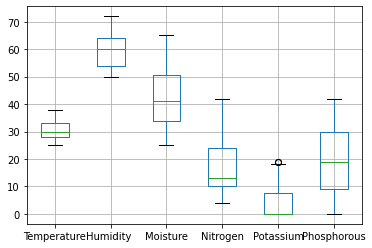

In [46]:
ax = fdf.boxplot()

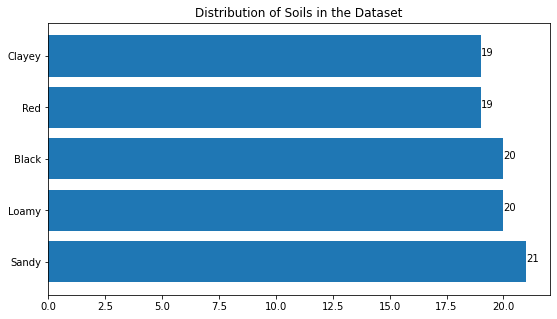

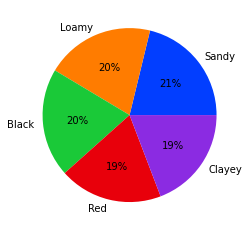

In [47]:
labels = fdf["Soil_Type"].unique()
counts = list(fdf["Soil_Type"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
plt.title("Distribution of Soils in the Dataset")
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

palette_color = sns.color_palette('bright')
plt.pie(counts, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

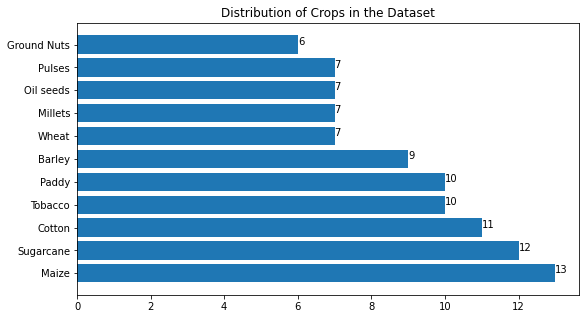

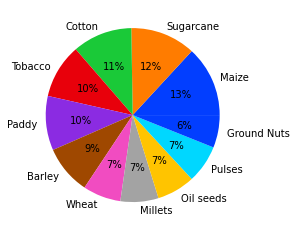

In [48]:
labels = fdf["Crop_Type"].unique()
counts = list(fdf["Crop_Type"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
plt.title("Distribution of Crops in the Dataset")

for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

palette_color = sns.color_palette('bright')
plt.pie(counts, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

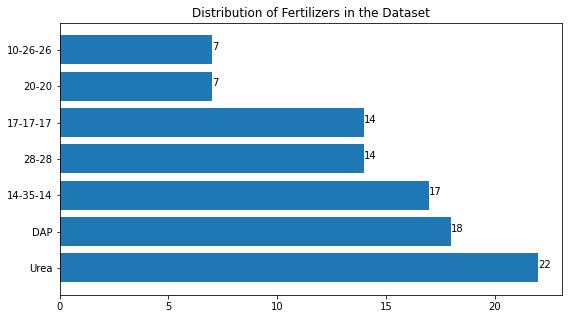

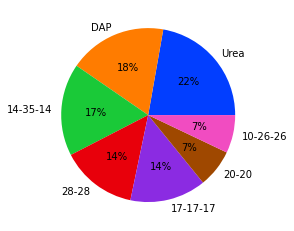

In [49]:
labels = fdf["Fertilizer_Name"].unique()
counts = list(fdf["Fertilizer_Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
plt.title("Distribution of Fertilizers in the Dataset")

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
plt.show()

palette_color = sns.color_palette('bright')
plt.pie(counts, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

In [50]:
continuous_data_cols = ["Temperature", "Humidity ", "Moisture", "Nitrogen", "Potassium","Phosphorous"]
categorical_data_cols = ["Soil_Type", "Crop_Type"]
class_col = ["Fertilizer_Name"]

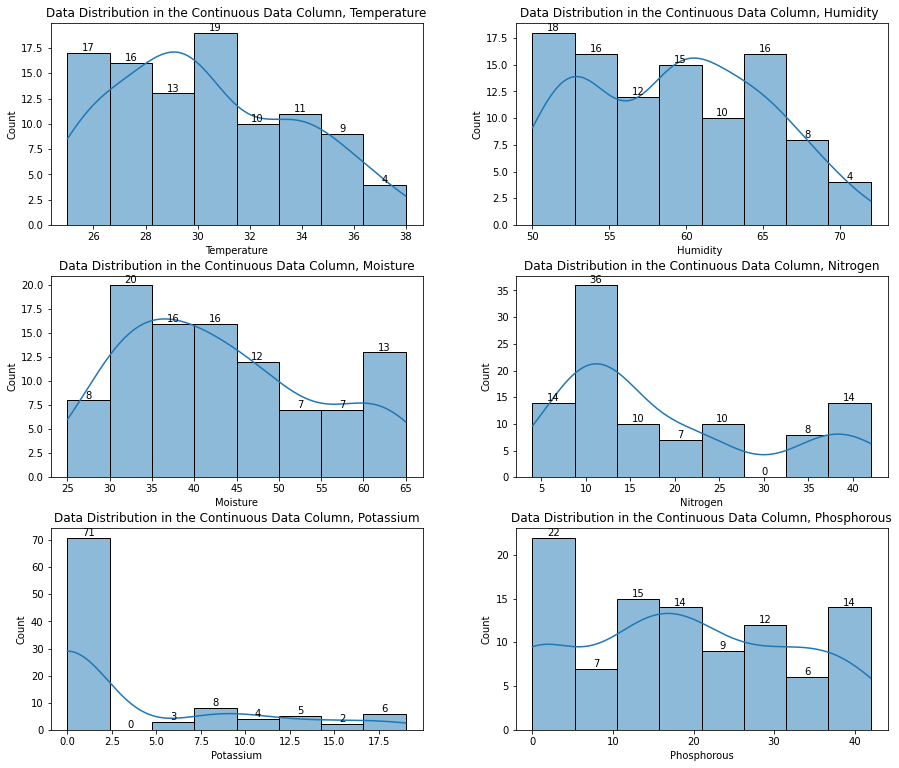

In [51]:
plt.figure(figsize=(15,13))
i = 1
plt.subplots_adjust(hspace=.25, wspace=0.25)
for column in continuous_data_cols[:]:
    plt.subplot(3,2,i)
    str1 = "Data Distribution in the Continuous Data Column, "+column
    plt.title(str1)
    b = sns.histplot(fdf[column], kde=True)
    for j in b.containers:
        b.bar_label(j,)
    i+=1

C:\Users\akank\anacondaexe\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akank\anacondaexe\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


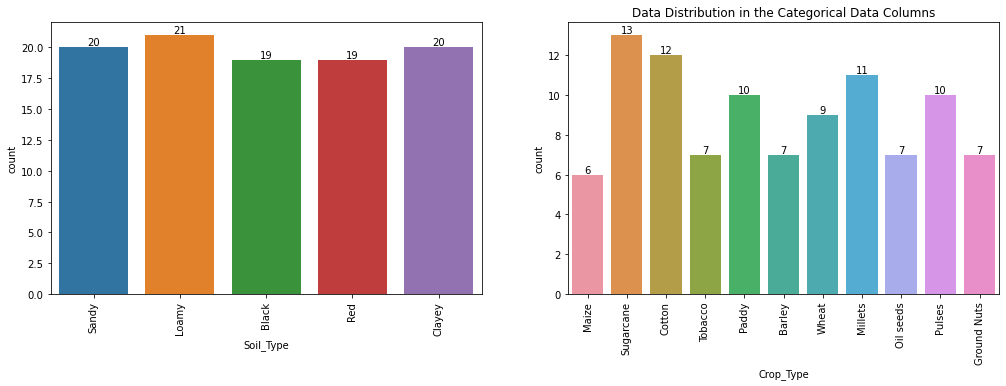

In [52]:
plt.figure(figsize=(17,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    b = sns.countplot(fdf[column])
    plt.xticks(rotation = 90)
    i+=1
    for j in b.containers:
        b.bar_label(j,)
plt.title("Data Distribution in the Categorical Data Columns")   
plt.show()

<Figure size 1512x1224 with 0 Axes>

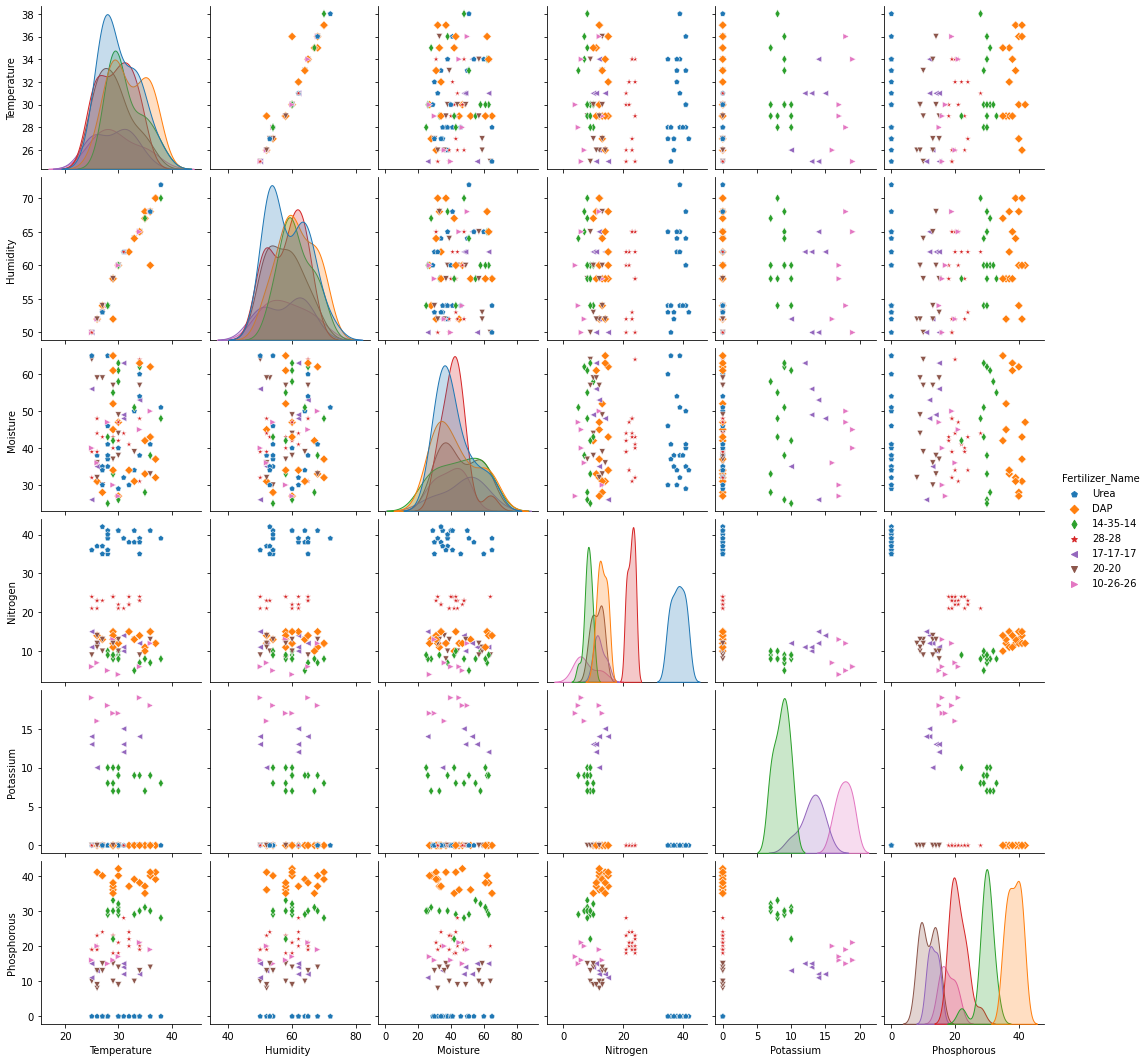

In [53]:
plt.figure(figsize=(21,17))
sns.pairplot(fdf[continuous_data_cols + ["Fertilizer_Name"]], hue = "Fertilizer_Name", markers=["p", "D", "d", "*", "<","v",">"])
#Pair Plot for Continuous Data Columns against Fertilizer Name") 
plt.show()

<AxesSubplot:title={'center':'Correlation between features'}>

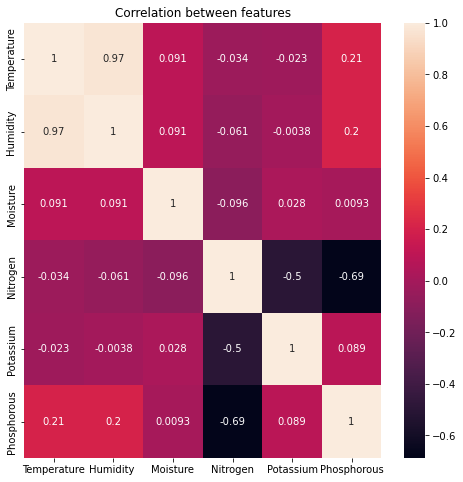

In [54]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = fdf.corr()
sns.heatmap(corr, annot=True)

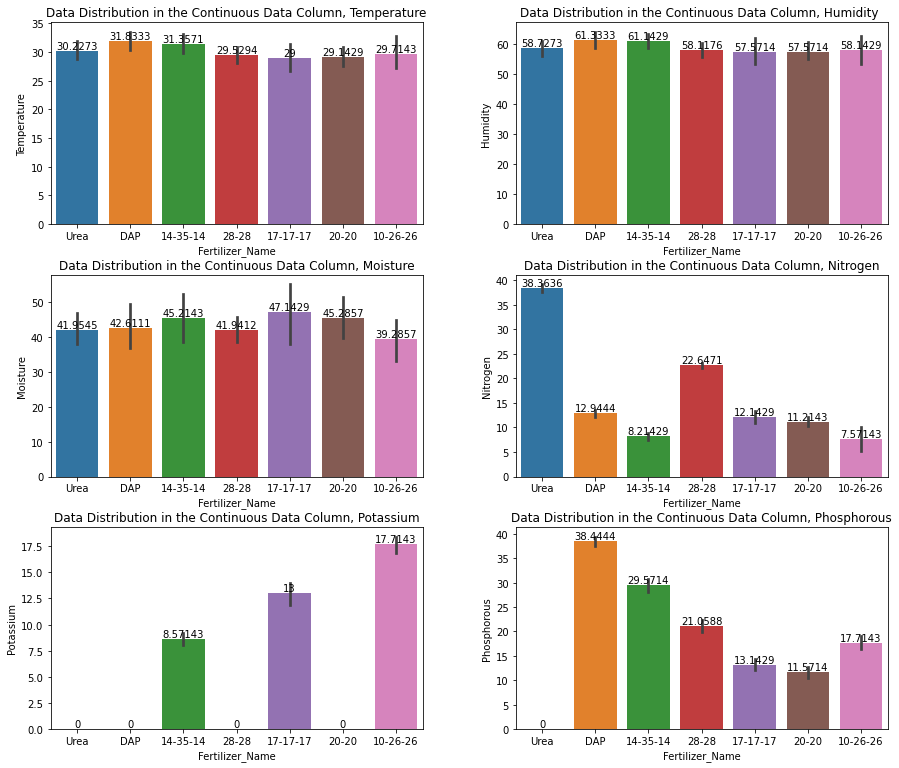

In [55]:
plt.figure(figsize=(15,13))
i = 1
plt.subplots_adjust(hspace=.25, wspace=0.25)
for column in continuous_data_cols[:]:
    plt.subplot(3,2,i)
    str1 = "Data Distribution in the Continuous Data Column, "+column
    plt.title(str1)
    #sns.histplot(fdf[column], kde=True)
    sns.color_palette("tab10")
    ax=sns.barplot(x="Fertilizer_Name", y=column, data=fdf)
    ax.set(xlabel="Fertilizer_Name", ylabel=column)
    for j in ax.containers:
        ax.bar_label(j,)
    i+=1

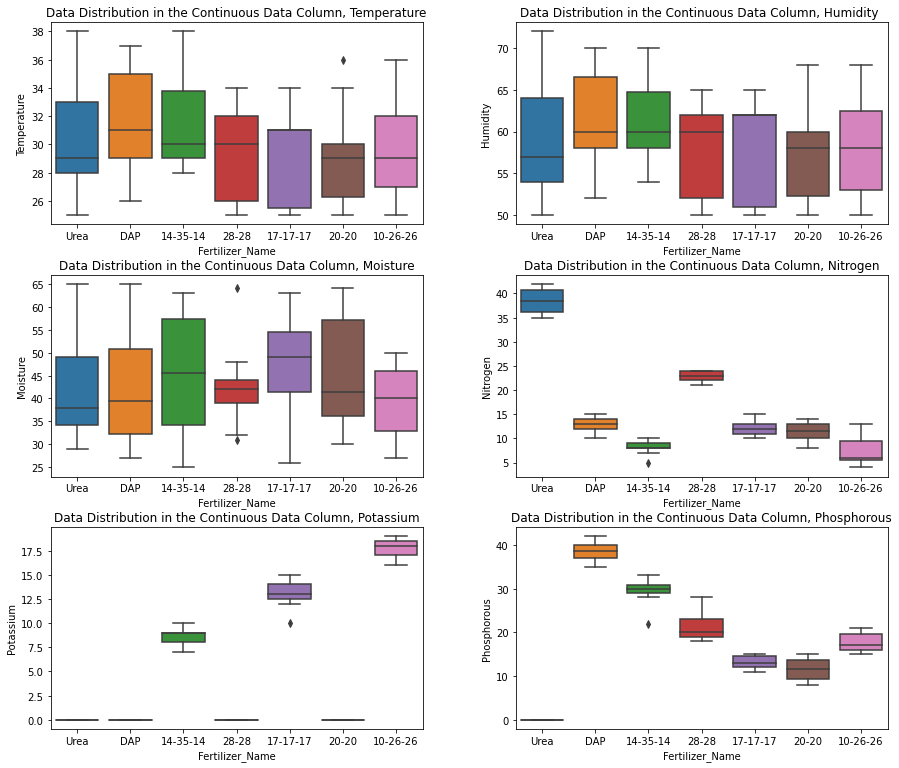

In [56]:
plt.figure(figsize=(15,13))
i = 1
plt.subplots_adjust(hspace=.25, wspace=0.25)
for column in continuous_data_cols[:]:
    plt.subplot(3,2,i)
    str1 = "Data Distribution in the Continuous Data Column, "+column
    plt.title(str1)
    #sns.histplot(fdf[column], kde=True)
    sns.color_palette("tab10")
    ax=sns.boxplot(x="Fertilizer_Name", y=column, data=fdf)
    ax.set(xlabel="Fertilizer_Name", ylabel=column)
    for j in ax.containers:
        ax.bar_label(j,)
    i+=1

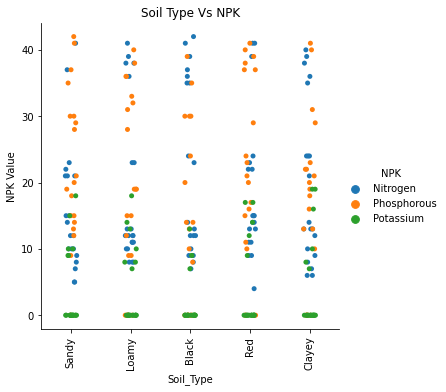

In [57]:
cr_ds_npk = pd.melt(fdf, id_vars=["Soil_Type"], value_vars=["Nitrogen", "Phosphorous", "Potassium"],var_name='NPK', value_name='value')
ax = sns.catplot(x="Soil_Type", y="value", hue="NPK", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("Soil_Type")
#plt.xlabel("Value")
plt.title("Soil Type Vs NPK")

ax.set(xlabel="Soil_Type", ylabel="NPK Value")

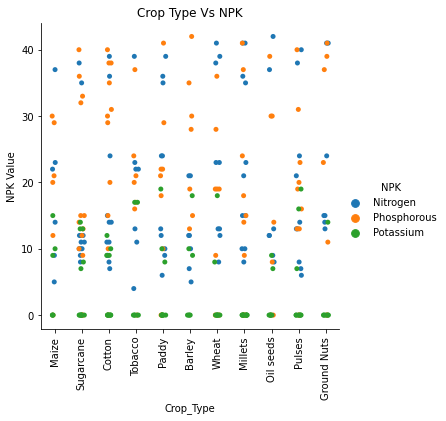

In [58]:
cr_ds_npk = pd.melt(fdf, id_vars=["Crop_Type"], value_vars=["Nitrogen", "Phosphorous", "Potassium"],var_name='NPK', value_name='value')
ax = sns.catplot(x="Crop_Type", y="value", hue="NPK", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("Crop_Type")
#plt.xlabel("Value")
plt.title("Crop Type Vs NPK")

ax.set(xlabel="Crop_Type", ylabel="NPK Value")

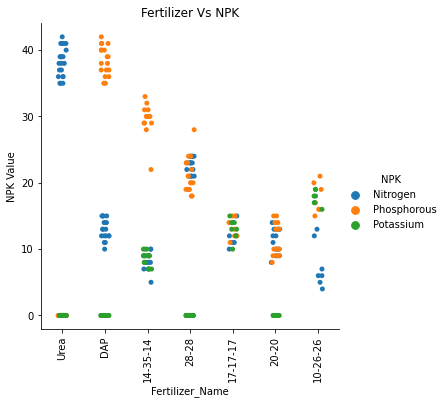

In [59]:
cr_ds_npk = pd.melt(fdf, id_vars=["Fertilizer_Name"], value_vars=["Nitrogen", "Phosphorous", "Potassium"],var_name='NPK', value_name='value')
ax = sns.catplot(x="Fertilizer_Name", y="value", hue="NPK", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("_Fertilizer_Name")
#plt.xlabel("Value")
plt.title("Fertilizer Vs NPK")

ax.set(xlabel="Fertilizer_Name", ylabel="NPK Value")

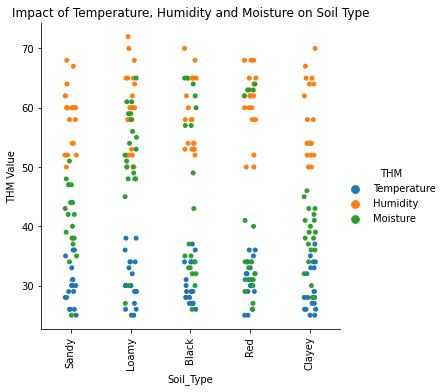

In [60]:
cr_ds_npk = pd.melt(fdf, id_vars=["Soil_Type"], value_vars=["Temperature", "Humidity ", "Moisture"],var_name='THM', value_name='value')
ax = sns.catplot(x="Soil_Type", y="value", hue="THM", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("Soil_Type")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity and Moisture on Soil Type")

ax.set(xlabel="Soil_Type", ylabel="THM Value")

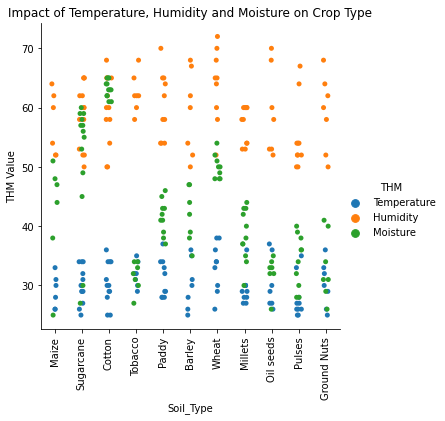

In [61]:
cr_ds_npk = pd.melt(fdf, id_vars=["Crop_Type"], value_vars=["Temperature", "Humidity ", "Moisture"],var_name='THM', value_name='value')
ax = sns.catplot(x="Crop_Type", y="value", hue="THM", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("Crop_Type")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity and Moisture on Crop Type")

ax.set(xlabel="Soil_Type", ylabel="THM Value")

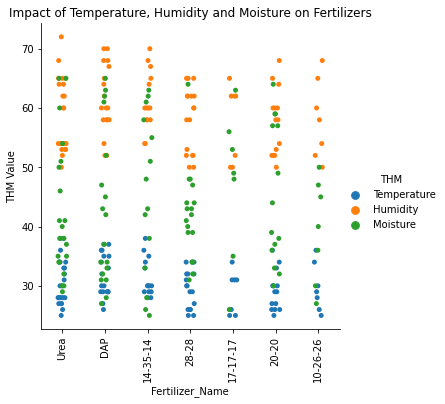

In [62]:
cr_ds_npk = pd.melt(fdf, id_vars=["Fertilizer_Name"], value_vars=["Temperature", "Humidity ", "Moisture"],var_name='THM', value_name='value')
ax = sns.catplot(x="Fertilizer_Name", y="value", hue="THM", data=cr_ds_npk)
plt.xticks(rotation=90)
plt.xlabel("Fertilizer_Name")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity and Moisture on Fertilizers")

ax.set(xlabel="Fertilizer_Name", ylabel="THM Value")

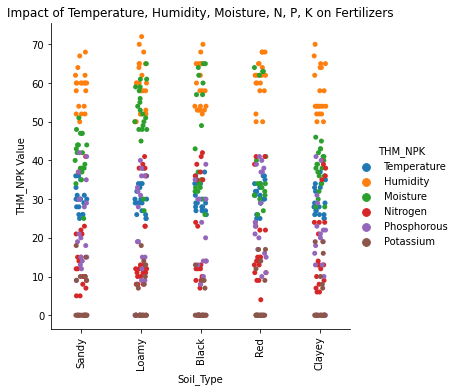

In [63]:
cr_ds_npk = pd.melt(fdf, id_vars=["Soil_Type"], value_vars=["Temperature", "Humidity ", "Moisture","Nitrogen", "Phosphorous","Potassium"],var_name='THM_NPK', value_name='value')
ax = sns.catplot(x="Soil_Type", y="value", hue="THM_NPK", data=cr_ds_npk, s=5)
plt.xticks(rotation=90)
plt.xlabel("Soil_Type")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity, Moisture, N, P, K on Fertilizers")

ax.set(xlabel="Soil_Type", ylabel="THM_NPK Value")

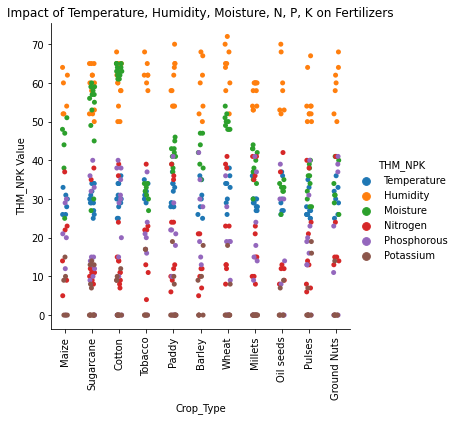

In [64]:
cr_ds_npk = pd.melt(fdf, id_vars=["Crop_Type"], value_vars=["Temperature", "Humidity ", "Moisture","Nitrogen", "Phosphorous","Potassium"],var_name='THM_NPK', value_name='value')
ax = sns.catplot(x="Crop_Type", y="value", hue="THM_NPK", data=cr_ds_npk, s=5)
plt.xticks(rotation=90)
plt.xlabel("Crop_Type")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity, Moisture, N, P, K on Fertilizers")

ax.set(xlabel="Crop_Type", ylabel="THM_NPK Value")

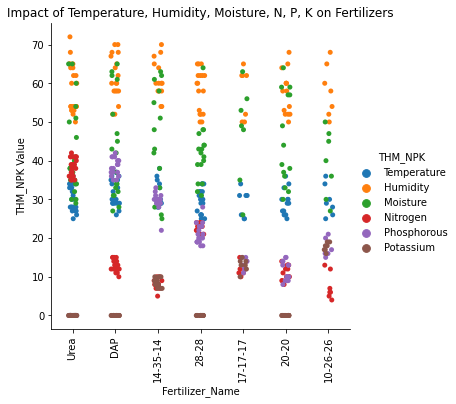

In [65]:
cr_ds_npk = pd.melt(fdf, id_vars=["Fertilizer_Name"], value_vars=["Temperature", "Humidity ", "Moisture","Nitrogen", "Phosphorous","Potassium"],var_name='THM_NPK', value_name='value')
ax = sns.catplot(x="Fertilizer_Name", y="value", hue="THM_NPK", data=cr_ds_npk, s=5)
plt.xticks(rotation=90)
plt.xlabel("Fertilizer_Name")
plt.xlabel("Value")
plt.title("Impact of Temperature, Humidity, Moisture, N, P, K on Fertilizers")

ax.set(xlabel="Fertilizer_Name", ylabel="THM_NPK Value")

In [66]:
"""
sd={}
cd={}
fd = {}
e_cr_ds, sd, cd, fd = encoding(fdf, sd, cd, fd)

print(sd)

features = e_cr_ds.iloc[:,0:8]
#print(features)
target = e_cr_ds.Fertilizer_Name

e_cr_ds

l1 = ["Soil_Type", "Crop_Type", "Fertilizer_Name"]
ld = encoding(fdf)
print(ld)
#ld[0]['a']=10
print(ld[0])

"""
state = 2
if state == 1:
    encoder_cols = categorical_data_cols+class_col
    #encoder_data = initiate_encoding(fdf, encoder_cols)
    df = encoder(fdf, encoder_cols)
else:
    sd={}
    cd={}
    fd = {}
    df, sd, cd, fd = encoding1(fdf, sd, cd, fd)
    
features = df.iloc[:,0:8]
target = df.Fertilizer_Name

Feature 0: 0.000000
Feature 1: 0.176408
Feature 2: 0.004075
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.921184
Feature 6: 0.688163
Feature 7: 0.828667


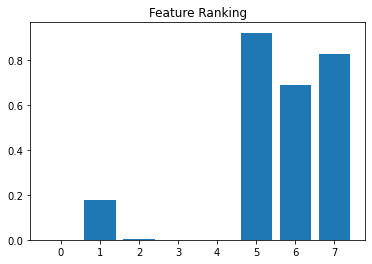

In [39]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)
#fs = SelectKBest(score_func=f_regression, k='all')
fs = SelectKBest(score_func=mutual_info_regression, k='all')

fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test) 
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Ranking")
plt.show()

In [40]:
X = fdf[['Temperature','Humidity ', 'Moisture','Soil_Type','Crop_Type','Nitrogen','Phosphorous','Potassium']]
y = fdf['Fertilizer_Name']

[ 0.10050639 -0.05844142  0.00210836 -0.00144667 -0.04243124  0.11594351
  0.03210305 -0.16251457]
2.0050832907054317
88.67689623552793


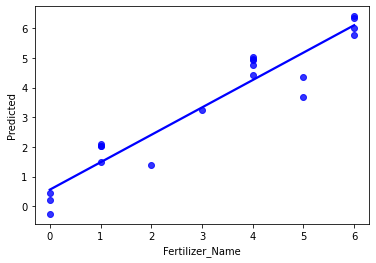

In [183]:

model1 = linear_model.LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

model1.fit(x_train,y_train)

print(model1.coef_)
print(model1.intercept_)

pred = model1.predict(x_test)
pred
Accuracy1=r2_score(y_test,pred)*100
print(Accuracy1)


#plt.scatter(y_test,pred);
plt.xlabel('Fertilizer_Name');
plt.ylabel('Predicted');

sns.regplot(x=y_test,y=pred,ci=None,color ='blue');

[ 0.136356   -0.07269041  0.00375366 -0.01654462 -0.04850113  0.11422211
  0.03228212 -0.16185853]
1.8072268937888527
87.18713025429382


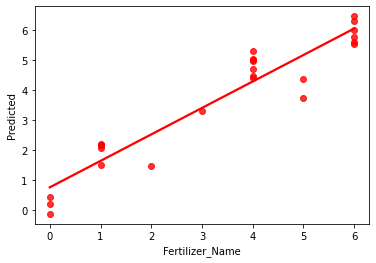

In [184]:


model2 = linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

model2.fit(x_train,y_train)

print(model2.coef_)
print(model2.intercept_)

pred = model2.predict(x_test)
pred
Accuracy2=r2_score(y_test,pred)*100
print(Accuracy2)


#plt.scatter(y_test,pred);
plt.xlabel('Fertilizer_Name');
plt.ylabel('Predicted');

sns.regplot(x=y_test,y=pred,ci=None,color ='red');

[ 0.13022278 -0.06816706  0.00243494  0.00916696 -0.04536918  0.11462498
  0.03098886 -0.16272123]
1.7400263303237442
87.76707737852799


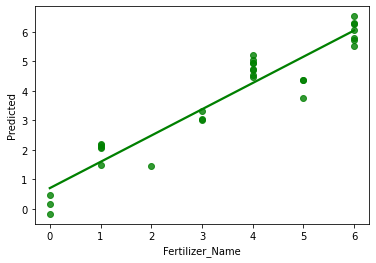

In [185]:

model3 = linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

model3.fit(x_train,y_train)

print(model3.coef_)
print(model3.intercept_)

pred = model3.predict(x_test)
pred
Accuracy3=r2_score(y_test,pred)*100
print(Accuracy3)


#plt.scatter(y_test,pred);
plt.xlabel('Fertilizer_Name');
plt.ylabel('Predicted');

sns.regplot(x=y_test,y=pred,ci=None,color ='green');

[ 0.16087191 -0.08794384  0.00034573  0.00697696 -0.03745741  0.11408247
  0.03104267 -0.15789821]
2.0230808525499473
87.0586614597486


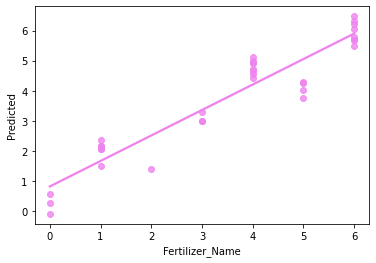

In [186]:
model4 = linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

model4.fit(x_train,y_train)

print(model4.coef_)
print(model4.intercept_)

pred = model4.predict(x_test)
pred
Accuracy4=r2_score(y_test,pred)*100
print(Accuracy4)


#plt.scatter(y_test,pred);
plt.xlabel('Fertilizer_Name');
plt.ylabel('Predicted');

sns.regplot(x=y_test,y=pred,ci=None,color ='violet');

In [187]:
Acc1 = [Accuracy1, Accuracy2, Accuracy3, Accuracy4]

Acc2 =  [ '%.2f' % elem for elem in Acc1 ]
Accuracy = [float(j) for j in Acc2]
Test_Size = ["20%", "25%", "30%", "33%"]
pd_acc = pd.DataFrame({"Test Size":Test_Size,"Accuracy":Accuracy}, columns=["Test Size","Accuracy"])

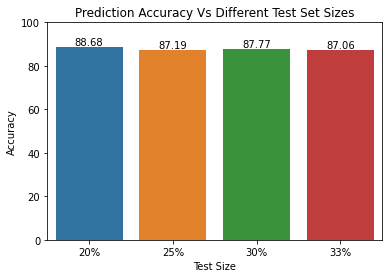

In [188]:
ax = sns.barplot(data=pd_acc, x="Test Size", y = "Accuracy")
plt.ylim(0.00, 100.0)
plt.title("Prediction Accuracy Vs Different Test Set Sizes")
for j in ax.containers:
    ax.bar_label(j,)